In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import pickle

In [2]:
def prepare_output(df):
    id_parts = df["id"].str.split("_", expand=True)
    
    tag_dict = {
        "rna_puzzle_1_native.pdb" : "rna_puzzle_1_NATIVE_1_solution_0_rpr",
        "rna_puzzle_2_native.pdb" : "rna_puzzle_2_NATIVE_hacked_on",
        "rna_puzzle_3_native.pdb" : "rna_puzzle_3_NATIVE_3_solution_0_rpr",
        "rna_puzzle_4_native.pdb" : "rna_puzzle_4_with_3IQP_NATIVE_4_0_solution_3V7E_rpr",
        "rna_puzzle_5_native.pdb" : "rna_puzzle_5_homology_NATIVE_5_0_solution_4p8z_rpr",
        "rna_puzzle_6_native.pdb" : "rna_puzzle_6_NATIVE_6_0_solution_4GXY_rpr",
        "rna_puzzle_7_native.pdb" : "rna_puzzle_7_NATIVE_7_0_solution_4r4v_rpr",
        "rna_puzzle_8_native.pdb" : "rna_puzzle_8_NATIVE_8_0_solution_4L81_rpr",
        "rna_puzzle_9_native.pdb" : "rna_puzzle_9_2xnw_NATIVE_5kpy",
        "rna_puzzle_10_native.pdb" : "rna_puzzle_10_NATIVE_10_0_solution_4LCK_rpr",
        "rna_puzzle_11_native.pdb" : "rna_puzzle_11_NATIVE",
        "rna_puzzle_12_native.pdb" : "rna_puzzle_12_NATIVE_12_4qln_solution_rpr",
        "rna_puzzle_13_native.pdb" : "rna_puzzle_13_NATIVE_13_0_solution_4XW7_rpr",
        "rna_puzzle_14b_native.pdb" : "rna_puzzle_14_bound_NATIVE_14_5ddp_bound_solution_rpr",
        "rna_puzzle_14f_native.pdb" : "rna_puzzle_14_free_NATIVE_14_5ddo_free_solution_rpr",
        "rna_puzzle_15_native.pdb" : "rna_puzzle_15_NATIVE_15_solution_0_rpr",
        "rna_puzzle_17_native.pdb" : "rna_puzzle_17_NATIVE_17_5k7c_solution_rpr",
        "rna_puzzle_18_native.pdb" : "rna_puzzle_18_with_4PQV_NATIVE_18_0_solution_5TPY_rpr",
        "rna_puzzle_19_native.pdb" : "rna_puzzle_19_NATIVE_19_5t5a_solution_0_rpr",
        "rna_puzzle_20_native.pdb" : "rna_puzzle_20_NATIVE_5y87_RNA",
        "rna_puzzle_21_native.pdb" : "rna_puzzle_21_NATIVE_21_5nwq_solution_0_rpr"
    }
    
    # Function to parse id column and create new columns
    def parse_id(row):
        id_parts = row["id"].replace(".pdb", "").split("_")
        row["puzzle_number"] = id_parts[2]
        if id_parts[3] == "decoys":
            row["source"] = "decoys"
            row["tag"] = "_".join(id_parts[4:])
        elif id_parts[3] == "near":
            row["source"] = "near_natives"
            row["tag"] = "_".join(id_parts[5:])
        elif id_parts[3] == "native":
            row["source"] = "native"
            row["tag"] = tag_dict.get(row["id"], "")
        return row

    df = df.apply(parse_id, axis=1)
    
    sort_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14b', '14f', '15', '17', '18', '19', '20', '21']
    def custom_sort(x):
        return x.map({p: i for i, p in enumerate(sort_order)})

    df = df.sort_values(by="puzzle_number", key=custom_sort)
    df = df.reset_index(drop=True)
    
    return df

In [3]:
df = pd.read_csv('/home/martinovici/scratch/GNN_project/data/eval_results/random.csv')
df

,id,file_path,rms,out
0,rna_puzzle_20_decoys_S_000207.pdb,/home/martinovici/scratch/GNN_project/data/eva...,7.781,7.265406
1,rna_puzzle_2_decoys_S_000004_456.pdb,/home/martinovici/scratch/GNN_project/data/eva...,2.995,5.652834
2,rna_puzzle_7_decoys_S_000007_140.pdb,/home/martinovici/scratch/GNN_project/data/eva...,26.764,8.726017
3,rna_puzzle_14b_decoys_S_000137_026.pdb,/home/martinovici/scratch/GNN_project/data/eva...,11.632,8.373178
4,rna_puzzle_7_decoys_S_000006_943.pdb,/home/martinovici/scratch/GNN_project/data/eva...,22.803,7.761959
...,...,...,...,...
20995,rna_puzzle_5_decoys_S_000017_556.pdb,/home/martinovici/scratch/GNN_project/data/eva...,25.848,8.492737
20996,rna_puzzle_2_decoys_S_000002_588.pdb,/home/martinovici/scratch/GNN_project/data/eva...,3.235,5.475060
20997,rna_puzzle_3_decoys_S_000009_1131.pdb,/home/martinovici/scratch/GNN_project/data/eva...,20.349,8.547412
20998,rna_puzzle_18_decoys_S_000002_070.pdb,/home/martinovici/scratch/GNN_project/data/eva...,13.631,7.753033


In [4]:
df = prepare_output(df)
df

,id,file_path,rms,out,puzzle_number,source,tag
0,rna_puzzle_1_decoys_S_000124_079.pdb,/home/martinovici/scratch/GNN_project/data/eva...,9.436,8.743551,1,decoys,S_000124_079
1,rna_puzzle_1_decoys_S_000079_011.pdb,/home/martinovici/scratch/GNN_project/data/eva...,6.570,5.479414,1,decoys,S_000079_011
2,rna_puzzle_1_decoys_S_000112_035.pdb,/home/martinovici/scratch/GNN_project/data/eva...,9.213,4.469028,1,decoys,S_000112_035
3,rna_puzzle_1_decoys_S_000160_096.pdb,/home/martinovici/scratch/GNN_project/data/eva...,8.334,4.999528,1,decoys,S_000160_096
4,rna_puzzle_1_decoys_S_000066_066.pdb,/home/martinovici/scratch/GNN_project/data/eva...,8.307,7.219808,1,decoys,S_000066_066
...,...,...,...,...,...,...,...
20995,rna_puzzle_21_decoys_S_000389_047.pdb,/home/martinovici/scratch/GNN_project/data/eva...,6.291,9.067631,21,decoys,S_000389_047
20996,rna_puzzle_21_decoys_S_000290_062.pdb,/home/martinovici/scratch/GNN_project/data/eva...,8.108,7.807074,21,decoys,S_000290_062
20997,rna_puzzle_21_decoys_S_000011_037.pdb,/home/martinovici/scratch/GNN_project/data/eva...,12.278,9.982964,21,decoys,S_000011_037
20998,rna_puzzle_21_decoys_S_000208_057.pdb,/home/martinovici/scratch/GNN_project/data/eva...,12.231,9.096127,21,decoys,S_000208_057


### Code from ARES for visualization of results

In [5]:
import collections as col
import math
import re

import matplotlib
import matplotlib.lines as mlines
import scipy.stats as ss

In [6]:
def quantize_best_rmsd(table, score_names):
    # We quantize best rmsd found within different sized subsets, for different RMSD thresholds, for different scoring methods.
    count_thresholds = [1, 10, 100, 1000, 10000, 100000]
    rmsd_thresholds = [10000, 10, 5, 2]

    best_rmsds = col.defaultdict(list)
    for name, group in table.groupby('puzzle_number'):
        for n in count_thresholds:
            best_rmsds['puzzle_number'].append(name)
            best_rmsds['n'].append(n)
            for score_name in score_names:
                tmp = group[['source', score_name, 'rms']].dropna()
                tmp = tmp[tmp['source'].apply(lambda x: x in ['near_natives', 'decoys'])]
                tmp = tmp.sort_values(score_name).reset_index()
            
                best_rmsd_top_n = np.min(tmp['rms'].iloc[:n])

                # We assign a category based on RMSD threshold.
                tmp = None
                for i, thresh in enumerate(rmsd_thresholds):
                    if best_rmsd_top_n < thresh:
                        tmp = i
                best_rmsd_top_n = tmp
                best_rmsds['best_rmsd_top_n_{:}'.format(score_name)].append(best_rmsd_top_n)
            
    best_rmsds = pd.DataFrame(best_rmsds)
    return best_rmsds

In [7]:
# Pretty printing and ordering of RNA puzzles

canonical_order = list(range(1, 22))
canonical_order.insert(14, 14)
canonical_order = [str(x) for x in canonical_order]
canonical_order[13] = canonical_order[13] + 'b' 
canonical_order[14] = canonical_order[14] + 'f'

def ready_for_print(rna_num):
    tmp = int(re.sub('[^0-9]','', rna_num))
    if tmp < 10:
        return ' ' + rna_num
    return rna_num

In [8]:
def reformat(best_rmsds, score_names):
    # Reformat in preparation for display.
    thresholds = [1, 10, 100]

    names = best_rmsds['puzzle_number'].unique()
    pcolor = []
    for score_name in score_names:
        pcolor_results = []
        for n in thresholds:
            curr_results = []
            for name in names:
                curr = best_rmsds[(best_rmsds['puzzle_number'] == name) & (best_rmsds['n'] == n)]
                assert len(curr) == 1
                curr_results.append(curr['best_rmsd_top_n_{:}'.format(score_name)].iloc[0])
            pcolor_results.append(curr_results)
        pcolor_results = pd.DataFrame(np.array(pcolor_results).T, columns=['{:}_{:}'.format(x, score_name) for x in thresholds])
        pcolor.append(pcolor_results)
    pcolor = pd.concat(pcolor + [pd.Series(names, name='puzzle_number'),], axis=1)
    pcolor.puzzle_number = pcolor.puzzle_number.astype("category")
    pcolor.puzzle_number.cat.set_categories(canonical_order, inplace=True)
    pcolor = pcolor.sort_values('puzzle_number', ascending=False)
    return pcolor

# Results

In [9]:
# loading data from benchmark results from ARES paper
benchmark = pd.read_csv('/home/martinovici/scratch/GNN_project/data/analysis/benchmark1.csv', dtype={'puzzle_number': object})
benchmark

,ares,rms,rosetta,tag,source,puzzle_number,3drnascore,rasp
0,7.576193,12.427,106.297,S_000002_183,decoys,15,21.9149,-27553.5
1,7.672672,10.730,152.536,S_000003_239,decoys,15,22.4963,-25670.3
2,8.025086,10.366,151.115,S_000007_074,decoys,15,22.0281,-28136.4
3,8.053055,13.913,145.586,S_000003_105,decoys,15,22.8792,-21628.6
4,8.190638,9.547,148.252,S_000012_029,decoys,15,22.7635,-25943.1
...,...,...,...,...,...,...,...,...
428190,7.713953,0.000,1393.058,rna_puzzle_10_NATIVE_10_0_solution_4LCK_rpr,native,10,24.3564,-69060.8
428191,8.055845,0.000,67.581,rna_puzzle_9_2xnw_NATIVE_5kpy,native,9,22.4335,-28408.8
428192,6.724915,0.000,-26.694,rna_puzzle_21_NATIVE_21_5nwq_solution_0_rpr,native,21,19.8853,-17529.5
428193,7.094471,0.000,89.403,rna_puzzle_11_NATIVE,native,11,20.4780,-27989.7


In [13]:
df1 = pd.read_csv('/home/martinovici/scratch/GNN_project/data/eval_results/mpnn_4_1layer_eval.csv')
df1 = prepare_output(df1)
df1 = df1.rename(columns={'out': 'mpnn_1'})

In [14]:
df2 = pd.read_csv('/home/martinovici/scratch/GNN_project/data/eval_results/mpnn_2_2layers_eval.csv')
df2 = prepare_output(df2)
df2 = df2.rename(columns={'out': 'mpnn_2'})

In [20]:
df3 = pd.read_csv('/home/martinovici/scratch/GNN_project/data/eval_results/mpnn_3_3layers_eval.csv')
df3 = prepare_output(df3)
df3 = df3.rename(columns={'out': 'mpnn_3'})

In [21]:
df = df1.merge(df2, on=["id", "file_path", "puzzle_number", "source", "tag", "rms"], how="left")
df = df.merge(df3, on=["id", "file_path", "puzzle_number", "source", "tag", "rms"], how="left")
df

,id,file_path,rms,mpnn_1,puzzle_number,source,tag,mpnn_2,mpnn_3
0,rna_puzzle_1_decoys_S_000182_024.pdb,/home/martinovici/scratch/GNN_project/data/eva...,4.529,6.015002,1,decoys,S_000182_024,7.751718,7.336406
1,rna_puzzle_1_decoys_S_000049_021.pdb,/home/martinovici/scratch/GNN_project/data/eva...,7.514,6.791068,1,decoys,S_000049_021,8.243129,6.639307
2,rna_puzzle_1_decoys_S_000018_072.pdb,/home/martinovici/scratch/GNN_project/data/eva...,11.347,6.140310,1,decoys,S_000018_072,8.806460,7.799351
3,rna_puzzle_1_decoys_S_000061_031.pdb,/home/martinovici/scratch/GNN_project/data/eva...,8.061,6.176554,1,decoys,S_000061_031,7.828625,6.322965
4,rna_puzzle_1_decoys_S_000136_084.pdb,/home/martinovici/scratch/GNN_project/data/eva...,9.617,5.279378,1,decoys,S_000136_084,7.351509,6.113011
...,...,...,...,...,...,...,...,...,...
20995,rna_puzzle_21_decoys_S_000004_020.pdb,/home/martinovici/scratch/GNN_project/data/eva...,11.701,8.384293,21,decoys,S_000004_020,9.388297,9.334551
20996,rna_puzzle_21_decoys_S_000144_093.pdb,/home/martinovici/scratch/GNN_project/data/eva...,7.753,8.755708,21,decoys,S_000144_093,10.054829,9.690681
20997,rna_puzzle_21_decoys_S_000066_096.pdb,/home/martinovici/scratch/GNN_project/data/eva...,10.136,10.615642,21,decoys,S_000066_096,9.216021,9.731489
20998,rna_puzzle_21_decoys_S_000283_013.pdb,/home/martinovici/scratch/GNN_project/data/eva...,7.631,10.374852,21,decoys,S_000283_013,9.337483,9.076903


In [22]:
df = df.merge(benchmark[["puzzle_number", "source", "tag", "ares"]], on=["puzzle_number", "source", "tag"], how="left")
df

,id,file_path,rms,mpnn_1,puzzle_number,source,tag,mpnn_2,mpnn_3,ares
0,rna_puzzle_1_decoys_S_000182_024.pdb,/home/martinovici/scratch/GNN_project/data/eva...,4.529,6.015002,1,decoys,S_000182_024,7.751718,7.336406,6.961023
1,rna_puzzle_1_decoys_S_000049_021.pdb,/home/martinovici/scratch/GNN_project/data/eva...,7.514,6.791068,1,decoys,S_000049_021,8.243129,6.639307,7.445800
2,rna_puzzle_1_decoys_S_000018_072.pdb,/home/martinovici/scratch/GNN_project/data/eva...,11.347,6.140310,1,decoys,S_000018_072,8.806460,7.799351,6.969103
3,rna_puzzle_1_decoys_S_000061_031.pdb,/home/martinovici/scratch/GNN_project/data/eva...,8.061,6.176554,1,decoys,S_000061_031,7.828625,6.322965,6.923379
4,rna_puzzle_1_decoys_S_000136_084.pdb,/home/martinovici/scratch/GNN_project/data/eva...,9.617,5.279378,1,decoys,S_000136_084,7.351509,6.113011,6.479765
...,...,...,...,...,...,...,...,...,...,...
20995,rna_puzzle_21_decoys_S_000004_020.pdb,/home/martinovici/scratch/GNN_project/data/eva...,11.701,8.384293,21,decoys,S_000004_020,9.388297,9.334551,8.636206
20996,rna_puzzle_21_decoys_S_000144_093.pdb,/home/martinovici/scratch/GNN_project/data/eva...,7.753,8.755708,21,decoys,S_000144_093,10.054829,9.690681,9.022440
20997,rna_puzzle_21_decoys_S_000066_096.pdb,/home/martinovici/scratch/GNN_project/data/eva...,10.136,10.615642,21,decoys,S_000066_096,9.216021,9.731489,8.953356
20998,rna_puzzle_21_decoys_S_000283_013.pdb,/home/martinovici/scratch/GNN_project/data/eva...,7.631,10.374852,21,decoys,S_000283_013,9.337483,9.076903,9.373426


In [23]:
score_names = ['ares', 'mpnn_1', 'mpnn_2', 'mpnn_3']
best_rmsds = quantize_best_rmsd(df, score_names)
pcolor = reformat(best_rmsds, score_names)

/tmp/ipykernel_941900/723997888.py:20: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  pcolor.puzzle_number.cat.set_categories(canonical_order, inplace=True)


/tmp/ipykernel_941900/3267586049.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('viridis')
/tmp/ipykernel_941900/3267586049.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(pcolor['puzzle_number'].apply(ready_for_print), fontdict={'horizontalalignment': 'left'})
/tmp/ipykernel_941900/3267586049.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(thresholds)
/tmp/ipykernel_941900/3267586049.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(thresholds)
/tmp/ipykernel_941900/3267586049.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(thresholds)
/tmp/ipykernel_941900/3267

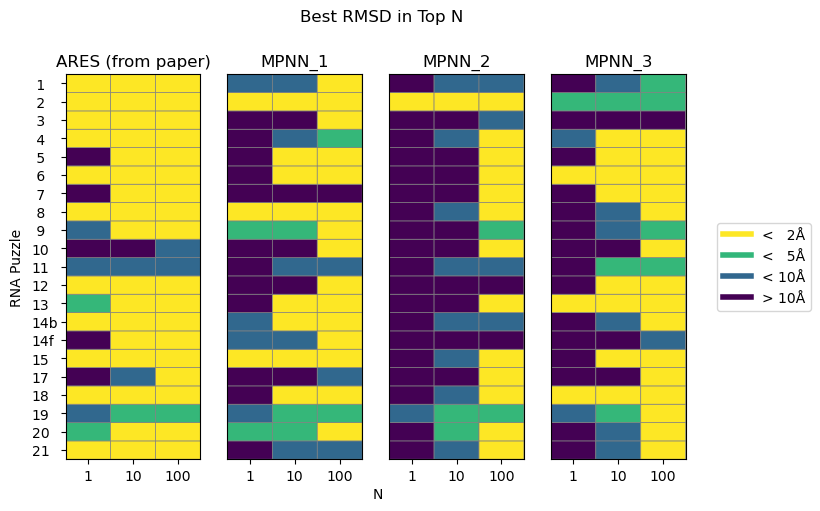

In [27]:
thresholds = [1, 10, 100]
# Plot as pcolor across puzzle, rmsd, count, and scorer dimensions.
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)    # Big subplot used to position display elements.
ax0 = fig.add_subplot(141)
ax1 = fig.add_subplot(142)
ax2 = fig.add_subplot(143)
ax3 = fig.add_subplot(144)


# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.yaxis.set_ticks([])
ax.xaxis.set_ticks_position('none')
ax.set_xticklabels([])
ax.xaxis.set_ticks([])

cmap = matplotlib.cm.get_cmap('viridis')
ax0.pcolor(pcolor[['{:}_ares'.format(x) for x in thresholds]], edgecolors='gray', linewidths=0.5, cmap=cmap, vmin=0, vmax=3)
ax0.set_yticklabels(pcolor['puzzle_number'].apply(ready_for_print), fontdict={'horizontalalignment': 'left'})
ax0.tick_params(axis='y', pad=21)
ax0.set_yticks(np.arange(pcolor.shape[0]) + 0.5, minor=False)
ax0.set_xticklabels(thresholds)
ax0.set_xticks(np.arange(len(thresholds)) + 0.5, minor=False)
ax0.title.set_text('ARES (from paper)')

ax1.pcolor(pcolor[['{:}_mpnn_1'.format(x) for x in thresholds]], edgecolors='gray', linewidths=0.5, cmap=cmap, vmin=0, vmax=3)
ax1.set_yticklabels([])
ax1.set_yticks([])
ax1.set_xticklabels(thresholds)
ax1.set_xticks(np.arange(len(thresholds)) + 0.5, minor=False)
ax1.title.set_text('MPNN_1')

ax2.pcolor(pcolor[['{:}_mpnn_2'.format(x) for x in thresholds]], edgecolors='gray', linewidths=0.5, cmap=cmap, vmin=0, vmax=3)
ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.set_xticklabels(thresholds)
ax2.set_xticks(np.arange(len(thresholds)) + 0.5, minor=False)
ax2.title.set_text('MPNN_2')

ax3.pcolor(pcolor[['{:}_mpnn_3'.format(x) for x in thresholds]], edgecolors='gray', linewidths=0.5, cmap=cmap, vmin=0, vmax=3)
ax3.set_yticklabels([])
ax3.set_yticks([])
ax3.set_xticklabels(thresholds)
ax3.set_xticks(np.arange(len(thresholds)) + 0.5, minor=False)
ax3.title.set_text('MPNN_3')


ax.set_xlabel('N', x=0.63, labelpad=20)
ax.set_ylabel('RNA Puzzle', labelpad=30)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

custom_lines = [mlines.Line2D([0], [0], color=cmap(1.), lw=4),
                mlines.Line2D([0], [0], color=cmap(.66), lw=4),
                mlines.Line2D([0], [0], color=cmap(.33), lw=4),
                mlines.Line2D([0], [0], color=cmap(0.), lw=4)]
ax.legend(custom_lines, 
          [ u'<   2Å', u'<   5Å', u'< 10Å', u'> 10Å'], 
          loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.suptitle('Best RMSD in Top N', x=0.52, y=1.01)
plt.show()

# Average evaluation loss per network

In [13]:
def print_stats(values):
    print('min =', np.min(values))
    print('max =', np.max(values))
    print('median =', np.median(values))
    print('mean =', np.mean(values))
    print('std =', np.std(values))

In [20]:
def print_for_table(values):
    print(f'{np.mean(values):.2f} +/- {np.std(values):.2f}')

### 1 GNN layer

In [21]:
gcn_1layer_losses = [100.51959229493222, 82.89936799014369, 92.44223366007863, 99.25844613140818, 97.6672756012984]
gat_1layer_losses = [91.5408609417811, 96.60240529468979, 93.68744825845972, 97.80606695928559, 97.78378617100128]
mpnn_1layer_losses = [85.93574820213092, 90.63185132515521, 87.45624858114219, 84.74177238189418, 86.35296602774977]
print('1 GCN layer:')
print_stats(gcn_1layer_losses)
print_for_table(gcn_1layer_losses)
print()
print('1 GAT layer:')
print_stats(gat_1layer_losses)
print_for_table(gat_1layer_losses)
print()
print('1 MPNN layer:')
print_stats(mpnn_1layer_losses)
print_for_table(mpnn_1layer_losses)
print()

1 GCN layer:
min = 82.89936799014369
max = 100.51959229493222
median = 97.6672756012984
mean = 94.55738313557222
std = 6.44519257949484
94.56 +/- 6.45

1 GAT layer:
min = 91.5408609417811
max = 97.80606695928559
median = 96.60240529468979
mean = 95.4841135250435
std = 2.4782165170528505
95.48 +/- 2.48

1 MPNN layer:
min = 84.74177238189418
max = 90.63185132515521
median = 86.35296602774977
mean = 87.02371730361445
std = 2.0023272004875516
87.02 +/- 2.00



### 2 GNN layers

In [22]:
gcn_2layers_losses = [88.02857534283639, 106.7026559296276, 90.27161790706327, 102.33674745953446, 90.52250811385565]
gat_2layers_losses = [95.67094803749961, 97.31517081794938, 99.04790173287327, 93.11432352227584, 95.09496367316873]
mpnn_2layers_losses = [83.2293081342613, 79.09806974572047, 102.45104308303058, 81.02986041161563, 83.14740194241236]
print('2 GCN layers:')
print_stats(gcn_2layers_losses)
print_for_table(gcn_2layers_losses)
print()
print('2 GAT layers:')
print_stats(gat_2layers_losses)
print_for_table(gat_2layers_losses)
print()
print('2 MPNN layers:')
print_stats(mpnn_2layers_losses)
print_for_table(mpnn_2layers_losses)
print()

2 GCN layers:
min = 88.02857534283639
max = 106.7026559296276
median = 90.52250811385565
mean = 95.57242095058348
std = 7.48529201737248
95.57 +/- 7.49

2 GAT layers:
min = 93.11432352227584
max = 99.04790173287327
median = 95.67094803749961
mean = 96.04866155675339
std = 2.013059075094883
96.05 +/- 2.01

2 MPNN layers:
min = 79.09806974572047
max = 102.45104308303058
median = 83.14740194241236
mean = 85.79113666340807
std = 8.468431695524915
85.79 +/- 8.47



### 3 GNN layers

In [23]:
gcn_3layers_losses = [95.26431191766183, 98.30492377367027, 110.29811953990334, 106.20047184395297, 82.6476684097669]
gat_3layers_losses = [97.54767784912522, 104.63318095296472, 102.84216215859158, 94.419086512428, 98.99351361779458]
mpnn_3layers_losses = [99.72811635483374, 94.04632401457677, 81.86019212119808, 85.6855609949145, 84.24913476410318]
print('3 GCN layers:')
print_stats(gcn_3layers_losses)
print_for_table(gcn_3layers_losses)
print()
print('3 GAT layers:')
print_stats(gat_3layers_losses)
print_for_table(gat_3layers_losses)
print()
print('3 MPNN layers:')
print_stats(mpnn_3layers_losses)
print_for_table(mpnn_3layers_losses)
print()

3 GCN layers:
min = 82.6476684097669
max = 110.29811953990334
median = 98.30492377367027
mean = 98.54309909699106
std = 9.594662605673228
98.54 +/- 9.59

3 GAT layers:
min = 94.419086512428
max = 104.63318095296472
median = 98.99351361779458
mean = 99.68712421818081
std = 3.666832129492687
99.69 +/- 3.67

3 MPNN layers:
min = 81.86019212119808
max = 99.72811635483374
median = 85.6855609949145
mean = 89.11386564992526
std = 6.708593334016723
89.11 +/- 6.71

